#### Importing libraries for reading and displaying images

In [1]:
#for reading images
import cv2
#for displaying arrays in form of images
import matplotlib.pyplot as plt

#### Reading image

In [2]:
image = cv2.imread('sample.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#### Displaying image

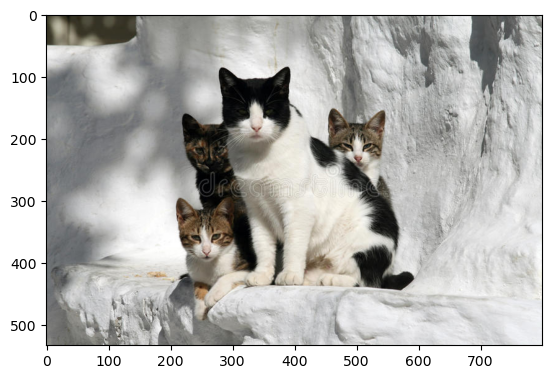

In [3]:
def s():
    plt.imshow(img)
    plt.show()
s()

#### Displaying channels

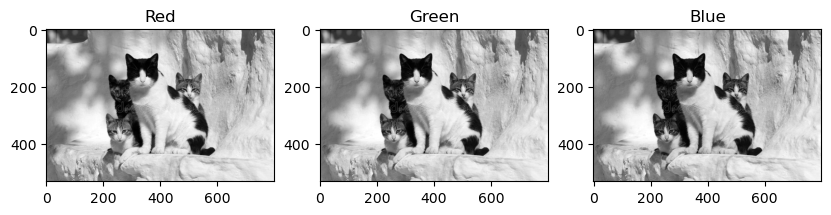

In [4]:
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.title("Red")
plt.imshow(img.T[0].T,cmap="gray")
plt.subplot(1,3,2)
plt.title("Green")
plt.imshow(img.T[1].T,cmap="gray")
plt.subplot(1,3,3)
plt.title("Blue")
plt.imshow(img.T[2].T,cmap="gray")
plt.show()

<br>
<center><h1> Image Manipulation

#### Channel addition
Adding all channel(RGB) values to a single channel

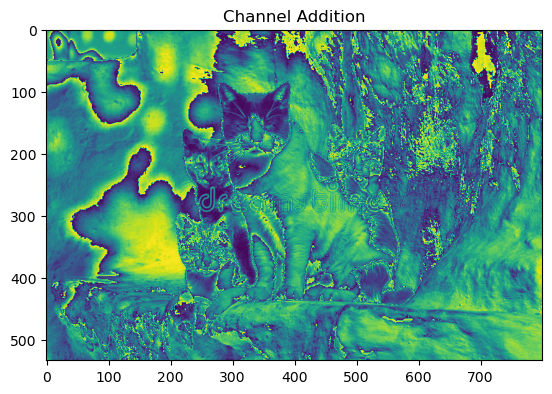

In [5]:
def channel_addition(img):
    return img.T[0].T+img.T[1].T+img.T[2].T
plt.title("Channel Addition")
plt.imshow(channel_addition(img))
plt.show()

#### Mirror Horizontal

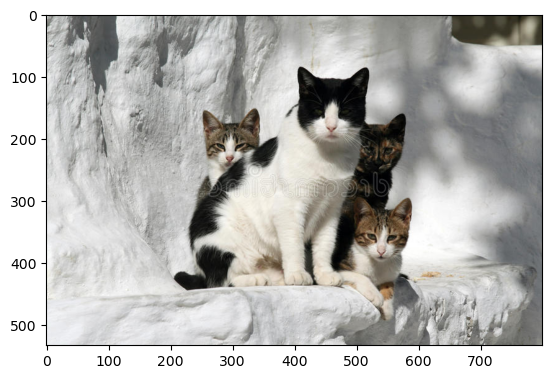

In [6]:
def mirror_h(img):
    mir_img=img.T.copy()
    for i,j in enumerate(img.T):
        mir_img[i]=[j[j.shape[0]-x-1] for x in range(j.shape[0])]
    return mir_img.T
plt.imshow(mirror_h(img))